In [1]:
import pandas as pd
df = pd.read_csv('sample_data/california_housing_train.csv')

1. Display 10 first rows

2. Show all streets with with a population of over 800

3. Graph the populations to show the distribution of different ranges of population.

4. Assuming that having streets with few houses but a high price is a problem for our analysis, determine a method of removing such streets and remove them from the dataset.

5. Graph the remaining street's median_housing_value based on population

In [2]:
print(df.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   
5    -114.58     33.63                29.0       1387.0           236.0   
6    -114.58     33.61                25.0       2907.0           680.0   
7    -114.59     34.83                41.0        812.0           168.0   
8    -114.59     33.61                34.0       4789.0          1175.0   
9    -114.60     34.83                46.0       1497.0           309.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200        

In [3]:
high_population = df[df['population'] > 800]
print(high_population)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
6        -114.58     33.61                25.0       2907.0           680.0   
8        -114.59     33.61                34.0       4789.0          1175.0   
10       -114.60     33.62                16.0       3741.0           801.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

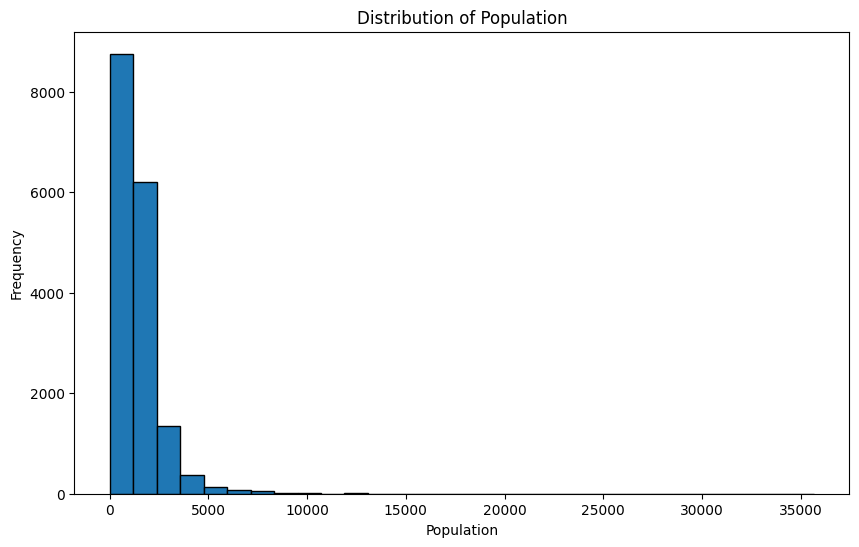

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['population'], bins=30, edgecolor='black')
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Calculate the ratio of median_house_value to housing_median_age
df['price_age_ratio'] = df['median_house_value'] / df['housing_median_age']

# Remove outliers (e.g., top 5% of price_age_ratio)
threshold = df['price_age_ratio'].quantile(0.95)
df_filtered = df[df['price_age_ratio'] <= threshold]

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_filtered)}")

Original dataset size: 17000
Filtered dataset size: 16150


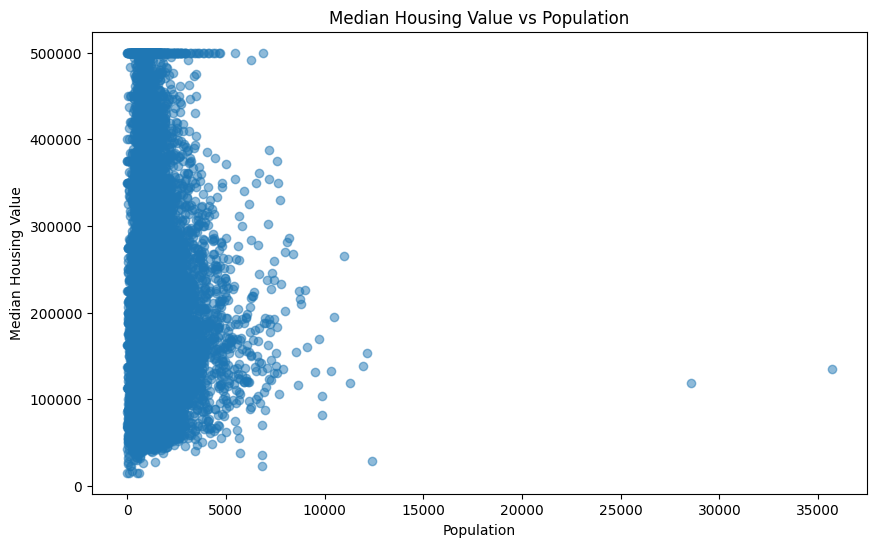

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['population'], df_filtered['median_house_value'], alpha=0.5)
plt.title('Median Housing Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median Housing Value')
plt.show()